In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

sp.init_printing()

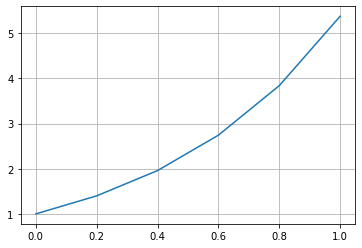

,x,u
0,0.0,1.00000
1,0.2,1.40000
2,0.4,1.96000
3,0.6,2.74400
4,0.8,3.84160
5,1.0,5.37824


In [2]:
### u' = u
### u(0) = 2
### u = c*exp(2t)

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = 2*x**0
u0 = 1

u = [0 for i in range(len(x))]
u[0] = u0

for i in range(len(x) - 1):
    h = (x[i+1] - x[i])
    u[i+1] = u[i] * (1 + y[i]*h)
    #print(f'{u[i+1]} = {u[i]} + {y[i]} * ({x[i+1]} - {x[i]})')

plt.plot(x, u)
plt.grid()
plt.show()

pd.DataFrame({'x': x, 'u': u})

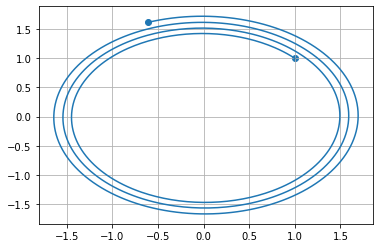

In [3]:
## Sistemas de EDO
n = 1000
t = np.linspace(0, 20, n)
h = t[1] - t[0]
x = t**0
y = t**0
x0 = 1
y0 = 0

for k in range(n-1):
    x[k+1] = x[k] + h * (- y[k])
    y[k+1] = y[k] + h * (+ x[k])
    
plt.plot(x, y)
plt.scatter([x[0], x[n-1]], [y[0], y[n-1]])
plt.grid()
plt.show()


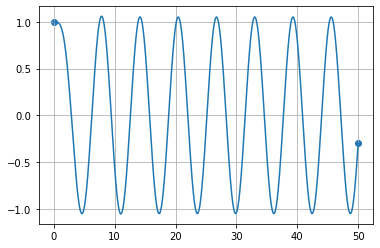

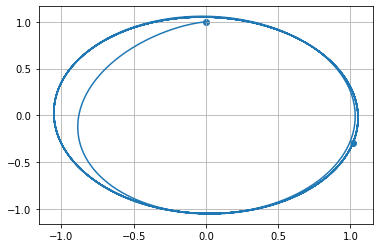

In [4]:
# y'' + 3y' + 2y = x^2
# w = y'
# w' = y''

# f1(x, y, w) => y' = w
# f2(x, y, w) => w' = -3w - 2y + x^2

n = 1000
x = np.linspace(0, 50, n)
h = x[1] - x[0]
w = [0 for _ in range(n)]
y = [0 for _ in range(n)]
w[0] = 0
y[0] = 1

for k in range(n-1):
    w[k+1] = w[k] + h * ( -w[k] -y[k] + np.cos(x[k]))
    y[k+1] = y[k] + h * (+ w[k])
    
plt.plot(x, y)
plt.scatter([x[0], x[n-1]], [y[0], y[n-1]])
plt.grid()
plt.show()

plt.plot(w, y)
plt.scatter([w[0], w[n-1]], [y[0], y[n-1]])
plt.grid()
plt.show()

## erro de truncamento
### erro local
erro introduzido em cada passo da iteração


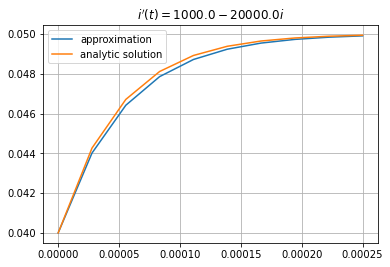

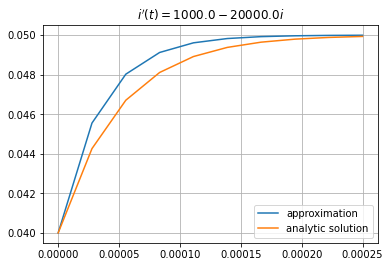

In [14]:
def heun_method_edo_solver(f_ux, u, x, x_, u0):
    u_ = [0 for i in range(len(x_))]
    u_[0] = u0

    for n in range(len(x_) - 1):
        h = x_[n+1] - x_[n]

        # first approximation
        u_[n+1] = u_[n] + h * f_ux.subs(x, x_[n]).subs(u, u_[n])
        
        f_un_xn = f_ux.subs(x, x_[n]).subs(u, u_[n])
        f_un1_xn1 = f_ux.subs(x, x_[n+1]).subs(u, u_[n+1])

        temp = (f_un_xn + f_un1_xn1) / 2
        
        # approximation correction
        u_[n+1] = u_[n] + h * temp
    return u_

def plot(u_, x_, f_ux, u_analytic):
    plt.grid()
    plt.plot(x_, u_, label='approximation')
    plt.plot(x_, u_analytic, label='analytic solution')
    plt.legend()
    plt.title('$i\'(t)='+sp.latex(f_ux)+'$')
    plt.show()

t = sp.Symbol('t')
i = sp.Symbol('i')

L = 60 * 10**(-3)
R = 1.2 * 10**(3)
V = 60
i0 = 40 * 10**(-3)
f_ti = V/L - R*i/L

ct = 5 * L/R
t_ = np.linspace(0, ct, 10)

i_analytic = 0.05-0.01*sp.exp(-20000*t)
i1 = [i_analytic.subs(t, a) for a in t_]

i_ = heun_method_edo_solver(f_ti, i, t, t_, i0)
plot(i_, t_, f_ti, i1)

from initial_value_problem import first_order_differential_equation
i_ = first_order_differential_equation(f_ti, i, t, t_, i0)
plot(i_, t_, f_ti, i1)